In [6]:
import pandas as pd
import re
from functools import reduce
import numpy as np
import json

df = pd.read_csv('imdb.csv')
df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


Research Question: What impact does the amount of mature content make on the ratings of movies/shows?

This question requires six different columns from the dataframe: 'Rate', 'Nudity', 'Violence', 'Profanity', 'Alcohol', and 'Frightening'. Of course, every column other than 'Rate' represents some sort of mature content. The entries in the mature content columns can be None, No Rate, Mild, Moderate, or Severe. Since a movie can have one more of these sorts of mature content, using a scale to help identify how much mature content is in one movie/show compared to another.

The scale will be represented as such:

In [7]:
scale_data = {'Mature Content': ['None', 'No Rate', 'Mild', 'Moderate', 'Severe'], 'Value on Scale': [0, 0, 1, 2, 3]}
scale_df = pd.DataFrame(scale_data)
scale_df

,Mature Content,Value on Scale
0,None,0
1,No Rate,0
2,Mild,1
3,Moderate,2
4,Severe,3


Note: This scale has been created for visual purposes only and is not part of the analysis code. 

Before beginning the process of plotting the 'Mature Content' and 'Rate' data, some data cleaning needs to be performed. Firstly, any duplicates in the dataframe were removed earlier. Furthermore, it was hard to tell initially if there were any entries that had 'No Rate' as their rate since they weren't near the top or bottom sections of the data. However, a further look at the original source of the data from Kaggle showed that there were indeed certain entries that were not wanted. As a result, the rows (entries) containing 'No Rate' in the 'Rate' Column were removed. Another change that needed to be made before plotting was converting the entries in the 'Rate' column to floats as they were Strings originally.

<AxesSubplot:title={'center':'Rating vs. Amount of Mature Content'}, xlabel='Rate', ylabel='Mature Content Sum'>

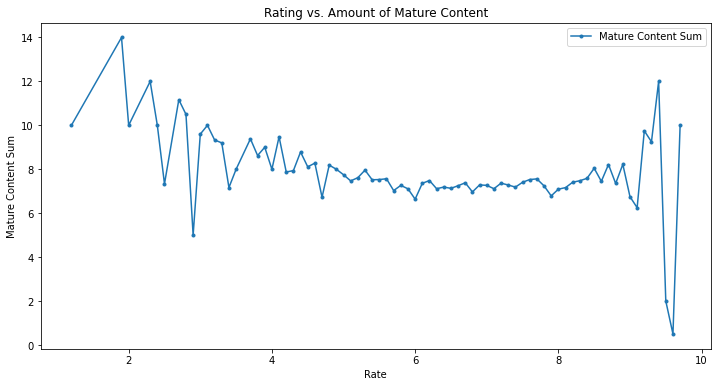

In [9]:
df = df[(df.Rate != 'No Rate')]     # Remove rows with any 'No Rate' entries in the 'Rate' column
df['Rate'] = df['Rate'].apply(lambda x: float(x))     # Remove rows with any 'No Rate' entries in the 'Rate' column  

def mature_count(x):
    count = 0;
    for i in x['Nudity']:            # function for calculating sum of mature content
        if (i == 'i'):
            count = count + 1
        elif (i == 't'):
            count = count + 2
        elif (i == 'S'):
            count = count + 3
    for i in x['Violence']:          # Mild, Moderate, and Severe levels of mature content are whwt need to be considered
        if (i == 'i'):               # so take unique letters in each word that aren't in the other words (i in Mild,
            count = count + 1        # t in Moderate, S in Severe) to keep track of levels of maturity in each entry
        elif (i == 't'):
            count = count + 2
        elif (i == 'S'):
            count = count + 3
    for i in x['Profanity']:
        if (i == 'i'):
            count = count + 1
        elif (i == 't'):
            count = count + 2
        elif (i == 'S'):
            count = count + 3
    for i in x['Alcohol']:
        if (i == 'i'):
            count = count + 1
        elif (i == 't'):
            count = count + 2
        elif (i == 'S'):
            count = count + 3       
    for i in x['Frightening']:
        if (i == 'i'):
            count = count + 1
        elif (i == 't'):
            count = count + 2
        elif (i == 'S'):
            count = count + 3
    return count

df['Mature Content Sum'] = df.apply(lambda x: mature_count(x), axis = 1)   
mature_content_df = df[['Mature Content Sum', 'Rate']]
mature_content_df.groupby(['Rate']).mean().plot.line(title = 'Rating vs. Amount of Mature Content', ylabel = 'Mature Content Sum', figsize = (12,6), style = '.-')

As we can see, there are certain points in the graph that stick out, with the most notable one being near the right-most part of the graph. Although there are clearly other points in the graph that are much higher or lower than others, none are more apart than the two just mentioned. As a result, we can remove these two points on the graph to have a better view of the others. These two points are not outliers, but rather a combination of two values that were uncommon. 

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:title={'center':'Rating vs. Amount of Mature Content'}, xlabel='Rate', ylabel='Mature Content Sum'>

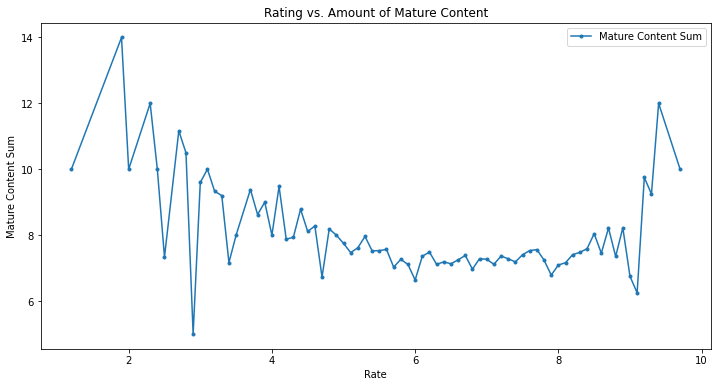

In [10]:
mature_content_df.sort_values(by = 'Rate')     # points being removed are near the right-most part of the graph so sorting would help us track them
mature_content_df.drop(index = [2780, 1754, 909], inplace = True)
mature_content_df.groupby(['Rate']).mean().plot.line(title = 'Rating vs. Amount of Mature Content', ylabel = 'Mature Content Sum', figsize = (12,6), style = '.-')

Note: Three points were removed instead of two since two of those three points were very close to one another.

After removing the aforementioned points, we can now try to identify trends in the data. The points in the graph steadily move downwards starting from the left side of this graph with many large dips being visible. The points than roughly starighten up near the middle before steadily moving upwards with a few large increases near the end. To verify these observations, we will find the slopes of these three sections of the graph by approximately dividing the total number of x values (rates) by 3. 

In [11]:
left_slope_interval = mature_content_df.sort_values(by = 'Rate').values[: len(mature_content_df) // 3].tolist()     
left_slope_values = left_slope_interval[0], left_slope_interval[-1]
left_slope = (left_slope_values[1][1] - left_slope_values[0][1]) / (left_slope_values[1][0] - left_slope_values[0][0])  #Using equation of slope between two points

middle_slope_interval = mature_content_df.sort_values(by = 'Rate').values[len(mature_content_df) // 3 : int(len(mature_content_df) / 1.5)].tolist()
middle_slope_values = middle_slope_interval[0], middle_slope_interval[-1]
middle_slope = (middle_slope_values[1][1] - middle_slope_values[0][1]) / (middle_slope_values[1][0] - middle_slope_values[0][0])

right_slope_interval = mature_content_df.sort_values(by = 'Rate').values[int(len(mature_content_df) / 1.5) : len(mature_content_df) - 1].tolist()
right_slope_values = right_slope_interval[0], right_slope_interval[-1]
right_slope = (right_slope_values[1][1] - right_slope_values[0][1]) / (right_slope_values[1][0] - right_slope_values[0][0])

print('Left slope:', left_slope)
print('Middle slope:', middle_slope)
print('Right slope:', right_slope)

Left slope: -1.325
Middle slope: -0.12857142857142861
Right slope: 1.0


The calculation for each of the slopes matches our observations from the graph. Both our graphs and calculations have now shown that this data takes on a shape similar to a parabola.  

In the context of our data, a parabolic-like shape means that as our rating increases, the amount of mature content either can increase, decrease, or just approximately stay the same. In response to the original research question, this essentially means that the amount of mature content does not have much of an impact on the rating of a movie or show. 